This notebook is an example of analyzing data with potential quality issues. The example compares Virginia traffic stop between police departments highlighting the quality of the race/ethnicity values.

In [1]:
import openpolicedata as opd
import pandas as pd
import numpy as np


Query for the entire table of available data

In [2]:
datasets = opd.datasets_query()

# datasets is a pandas DataFrame
datasets.head()

,State,SourceName,Agency,TableType,Year,Description,DataType,URL,date_field,dataset_id,agency_field,min_version,readme
0,Virginia,Virginia,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name,<NA>,https://data.virginia.gov/api/views/2c96-texw/...
1,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2019,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>,<NA>,<NA>
2,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2020,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>,<NA>,<NA>
3,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2019,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>,<NA>,<NA>
4,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2020,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>,<NA>,<NA>


Query for all available datasets from Virginia

In [3]:
df = opd.datasets_query(state="Virginia")
df

,State,SourceName,Agency,TableType,Year,Description,DataType,URL,date_field,dataset_id,agency_field,min_version,readme
0,Virginia,Virginia,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name,<NA>,https://data.virginia.gov/api/views/2c96-texw/...
1,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2019,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>,<NA>,<NA>
2,Virginia,Fairfax County,Fairfax County,TRAFFIC WARNINGS,2020,Traffic Warnings issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,actdate,<NA>,<NA>,<NA>,<NA>
3,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2019,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>,<NA>,<NA>
4,Virginia,Fairfax County,Fairfax County,TRAFFIC CITATIONS,2020,Traffic Citations issued by Fairfax County Police,ArcGIS,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,tc_date,<NA>,<NA>,<NA>,<NA>
94,Virginia,State Patrol,State Patrol,TRAFFIC STOPS,MULTI,Standardized stop data from the Stanford Open ...,CSV,https://stacks.stanford.edu/file/druid:yg821jf...,date,<NA>,<NA>,<NA>,https://github.com/stanford-policylab/opp/blob...
289,Virginia,Norfolk,Norfolk,USE OF FORCE,MULTI,This dataset is reports of both use of force a...,Socrata,data.norfolk.gov,date,fcqe-uvnb,<NA>,<NA>,https://data.norfolk.gov/api/views/fcqe-uvnb/f...
290,Virginia,Henrico County,Henrico County,CALLS FOR SERVICE,MULTI,This data contains calls for service in Henric...,Socrata,data.virginia.gov,date,g7aq-7uu3,<NA>,<NA>,https://data.virginia.gov/Public-Safety/Open-V...
291,Virginia,Virginia Beach,Virginia Beach,CALLS FOR SERVICE,2019,This dataset includes information on calls for...,CSV,https://vbgov-ckan-open-data.s3.amazonaws.com/...,<NA>,<NA>,<NA>,<NA>,https://data.vbgov.com/dataset/police-calls-fo...
292,Virginia,Virginia Beach,Virginia Beach,CALLS FOR SERVICE,2020,This dataset includes information on calls for...,CSV,https://vbgov-ckan-open-data.s3.amazonaws.com/...,<NA>,<NA>,<NA>,<NA>,https://data.vbgov.com/dataset/police-calls-fo...


To access the data, create a source using a Source Name (usually a police department name). There is an optional state input to clarify ambiguities (usually unnecessary). Create a data source for Virginia. 

In July 2020, a law went into effect in Virginia requiring all police departments to collect data on traffic stops and report it to the state. In July 2021, this law was expanded to pedestrian stops and more types of data were required to be collected

In [4]:
src = opd.Source(source_name="Virginia")
src.datasets

,State,SourceName,Agency,TableType,Year,Description,DataType,URL,date_field,dataset_id,agency_field,min_version,readme
0,Virginia,Virginia,MULTI,STOPS,MULTI,A data collection consisting of all traffic an...,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name,<NA>,https://data.virginia.gov/api/views/2c96-texw/...


For data spanning multiple years, there is a method for finding what years that data is available

In [5]:
# Find out what years are available from the stops table
years = src.get_years(table_type="STOPS")
print(years)

[2020, 2021, 2022]


If we want to analyze data for Charlottesville police department, we need to find the exact name of C'ville's PD

In [6]:
# Search for agencies containing "Charlottesville"
agencies = src.get_agencies(partial_name="Charlottesville")
print(agencies)

['Charlottesville Albemarle Airport Police Dept.', 'Charlottesville Police Department']


Now, let's load data from the source for 'Charlottesville Police Department'

In [7]:
opd.defs

<module 'openpolicedata.defs' from '/home/user/cjc/opd-examples/.venv/lib/python3.8/site-packages/openpolicedata/defs.py'>

In [8]:
# Load data from the source for the Charlottesville Police Department in 2021
agency = "Charlottesville Police Department"
year = 2021
t = src.load_from_url(year=year, table_type='STOPS', agency=agency)

load_from_url returns an OpenPoliceData Table class. It has a property called table that is a pandas or geopandas DataFrame depending on whether the data contains geographic information

In [9]:
# Make a copy so that any changes that we make to df do not affect t.table
df = t.table.copy()

print(f"df is a {type(df)}.")
print(f"{agency} reported data for {len(df)} stops in {year}")

df is a <class 'pandas.core.frame.DataFrame'>.
Charlottesville Police Department reported data for 2224 stops in 2021


In [10]:
# Show the first 5 rows of the table
df.head(n=5)

,incident_date,agency_name,jurisdiction,reason_for_stop,race,ethnicity,age,gender,action_taken,violation_type,specific_violation,person_searched,vehicle_searched,additional_arrest,person_type,english_speaking,virginia_crime_code,physical_force_by_officer,physical_force_by_subject,residency
0,2021-01-01,Charlottesville Police Department,CHARLOTTESVILLE,EQUIPMENT VIOLATION,WHITE,NON-HISPANIC,40,FEMALE,WARNING,COMMONWEALTH,46.2-715,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,Charlottesville Police Department,CHARLOTTESVILLE,TRAFFIC VIOLATION,WHITE,NON-HISPANIC,23,MALE,WARNING,COMMONWEALTH,46.2-804,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-02,Charlottesville Police Department,CHARLOTTESVILLE,TRAFFIC VIOLATION,WHITE,UNKNOWN,56,MALE,WARNING,COMMONWEALTH,46.2-862,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-02,Charlottesville Police Department,CHARLOTTESVILLE,TRAFFIC VIOLATION,WHITE,UNKNOWN,32,MALE,WARNING,COMMONWEALTH,46.2-862,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-02,Charlottesville Police Department,CHARLOTTESVILLE,TRAFFIC VIOLATION,WHITE,UNKNOWN,18,MALE,WARNING,COMMONWEALTH,46.2-862,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN


The columns property of the DataFrame can be checked to see what types of data is available

In [11]:
# What columns are in the table
df.columns

Index(['incident_date', 'agency_name', 'jurisdiction', 'reason_for_stop',
       'race', 'ethnicity', 'age', 'gender', 'action_taken', 'violation_type',
       'specific_violation', 'person_searched', 'vehicle_searched',
       'additional_arrest', 'person_type', 'english_speaking',
       'virginia_crime_code', 'physical_force_by_officer',
       'physical_force_by_subject', 'residency'],
      dtype='object')

Race (Black, White, Asian, etc.) and ethnicity (usually Hispanic vs. Non-Hispanic) are in different columns in the dataset. However, in analysis, they are commonly analyzed as a single variable (Hispanic of all races, White Non-Hispanic, Black Non-Hispanic, etc.). 

Let's make a new column that is a combination of race and ethnicity

In [12]:
# First, create a new column called race_eth that initially has the same values as the race column
df["race_eth"] = df["race"]

# For all rows where the ethnicity is HISPANIC, set "race_eth" column to HISPANIC
df.loc[df["ethnicity"] == "HISPANIC", "race_eth"] = "HISPANIC"
# For all rows where the ethnicity is UNKNOWN, set "race_eth" column to UNKNOWN
df.loc[df["ethnicity"] == "UNKNOWN", "race_eth"] = "UNKNOWN"

# Show a table containing all unique values and how many of each value is in the data
df["race_eth"].value_counts()

WHITE                        908
UNKNOWN                      627
BLACK OR AFRICAN AMERICAN    528
HISPANIC                     114
ASIAN/PACIFIC ISLANDER        39
AMERICAN INDIAN                8
Name: race_eth, dtype: int64

There are a lot of UNKNOWNs in our race/ethnicity column. This presents a potential data quality issue. Let's explore what's going on by looking at the race and ethnicity columns more closely.

Let's first use groupby to group the rows based on their values in the race and ethnicity columns. For example, all rows where race is WHITE and ethnicity is NON-HISPANIC, will be placed in one bucket, all rows where race is BLACK and ethnicity is HISPANIC will be placed in another, etc. (for all combos of race and ethnicity)

In [13]:
groups = df.groupby(["race","ethnicity"])
type(groups)

pandas.core.groupby.generic.DataFrameGroupBy

Next, we can apply a function to the groups. Let's use the size function to get how many stops fall in each bucket

In [14]:
num_stops_by_race_eth = groups.size()
num_stops_by_race_eth

race                       ethnicity   
AMERICAN INDIAN            NON-HISPANIC      8
                           UNKNOWN           1
ASIAN/PACIFIC ISLANDER     NON-HISPANIC     39
                           UNKNOWN          18
BLACK OR AFRICAN AMERICAN  HISPANIC          7
                           NON-HISPANIC    528
                           UNKNOWN          94
UNKNOWN                    HISPANIC         30
                           NON-HISPANIC     59
                           UNKNOWN          73
WHITE                      HISPANIC         77
                           NON-HISPANIC    908
                           UNKNOWN         382
dtype: int64

The above table would be easier to read if ethnicity were a column. We can do this with unstack 

In [15]:
df_stops_by_race_eth = num_stops_by_race_eth.unstack("ethnicity")
# Ensure that counts are integers
df_stops_by_race_eth = df_stops_by_race_eth.convert_dtypes(int)

# Let's calculate what percentage of ethnicity values are UNKNOWN for each race by adding a column and doing some math
df_stops_by_race_eth["Percent Unknown"] = np.round(df_stops_by_race_eth["UNKNOWN"]/df_stops_by_race_eth.sum(axis=1)*100,1)

df_stops_by_race_eth

ethnicity,HISPANIC,NON-HISPANIC,UNKNOWN,Percent Unknown
race,,,,
AMERICAN INDIAN,<NA>,8,1,11.1
ASIAN/PACIFIC ISLANDER,<NA>,39,18,31.6
BLACK OR AFRICAN AMERICAN,7,528,94,14.9
UNKNOWN,30,59,73,45.1
WHITE,77,908,382,27.9


Most of the UNKNOWNs in our race_eth column are due to UNKNOWNs in the ethnicity column. Let's try looking at the number UNKNOWNs in the ethnicity column over the course of 2021.

Text(0.5, 1.0, '# of Unknown Ethnicities in Charlottesville by Month')

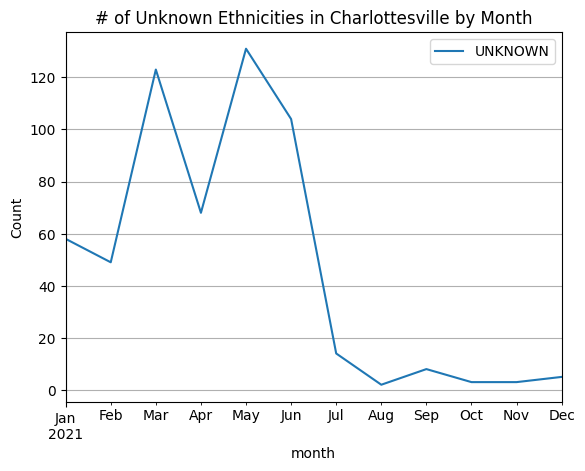

In [16]:
# Create a month category
# OPD automatically converts known date columns to numpy.datetime64 objects
# dt provides access to the underlying datetime
# to_period("M") converts the dates to Year-Month format
df["month"] = df["incident_date"].dt.to_period("M")

a = df.groupby(["month","ethnicity"]).size().unstack("ethnicity")
ax = a.plot(y="UNKNOWN", grid=True)
ax.set_ylabel("Count")
ax.set_title("# of Unknown Ethnicities in Charlottesville by Month")

It appears that the number of Unknowns drops off dramatically in July 2021. There may have been a slow rollout in complying with the Virginia Community Policing Act.

For a final example, let's look at police department that implemented data collection a little earlier and makes more stops. Let's do a comparison of search rates in Fairfax County broken down by race and ethnicity for 2021.

In [17]:
agency_comp = "Fairfax County Police Department"
t_ffx = src.load_from_url(year=year, table_type='STOPS', agency=agency_comp)
df_ffx = t_ffx.table.copy()

# Create combined race/ethnicity category
df_ffx["race_eth"] = df_ffx["race"]

# For all rows where the ethnicity is HISPANIC, set "race_eth" column to HISPANIC
df_ffx.loc[df_ffx["ethnicity"] == "HISPANIC", "race_eth"] = "HISPANIC"
# For all rows where the ethnicity is UNKNOWN, set "race_eth" column to UNKNOWN
df_ffx.loc[df_ffx["ethnicity"] == "UNKNOWN", "race_eth"] = "UNKNOWN"

# Group by whether the person was searched and race/ethnicity
searches = df_ffx.groupby(["person_searched","race_eth"]).size().unstack("race_eth")

searches

race_eth,AMERICAN INDIAN,ASIAN/PACIFIC ISLANDER,BLACK OR AFRICAN AMERICAN,HISPANIC,UNKNOWN,WHITE
person_searched,,,,,,
NO,88,1557,3574,4001,3291,8157
YES,1,57,338,513,12,346


In [18]:
# The number of searches is the sum of each column
number_of_stops = searches.sum()
# The number of searches is the number of Yes's for each group
number_of_searches = searches.loc["YES"]

# Calculate the search rate (% of people search over total people stopped)
percent_stops_with_search = np.round(number_of_searches/number_of_stops*100,1)

# Create a DataFrame out of the 3 metrics calculated above
searches_df = pd.DataFrame([number_of_stops, number_of_searches, percent_stops_with_search], 
    index=["# of Stops", "# of Searches", "% of Stops With Search"])
searches_df = searches_df.transpose()
searches_df["# of Stops"] = searches_df["# of Stops"].astype(int)
searches_df["# of Searches"] = searches_df["# of Searches"].astype(int)
# searches.dropna(inplace=True)
searches_df

,# of Stops,# of Searches,% of Stops With Search
race_eth,,,
AMERICAN INDIAN,89,1,1.1
ASIAN/PACIFIC ISLANDER,1614,57,3.5
BLACK OR AFRICAN AMERICAN,3912,338,8.6
HISPANIC,4514,513,11.4
UNKNOWN,3303,12,0.4
WHITE,8503,346,4.1


Text(0.5, 1.0, 'Percentage of Stops Where the Person is Searched')

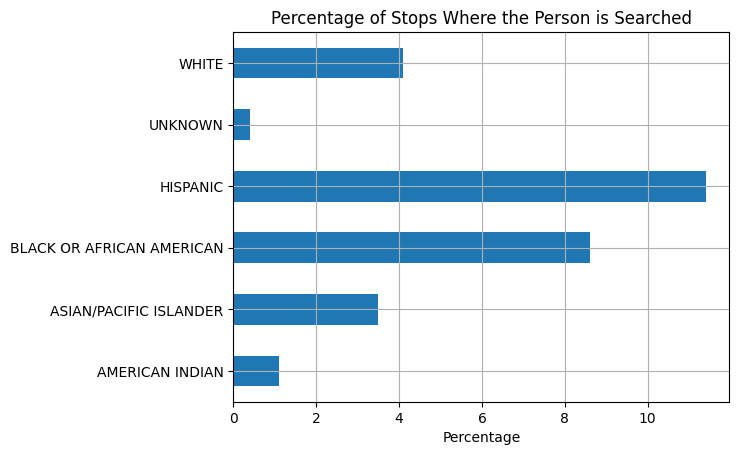

In [19]:
ax = searches_df.plot.barh(y="% of Stops With Search", grid=True, legend=False)
ax.set_ylabel("")
ax.set_xlabel("Percentage")
ax.set_title("Percentage of Stops Where the Person is Searched")